(1797, 64)
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]


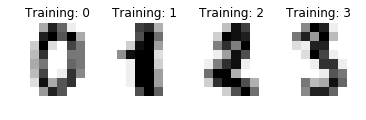

In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)

label=digits.target

data = digits.images.reshape((n_samples, -1))

print(data.shape)
print(data[:2])

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(data, label,test_size=0.3, random_state=41)

#print(data.shape)

In [2]:
def random_batch(x_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(x_train), batch_size)
    x_batch = x_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return x_batch, y_batch

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 64]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.int64, [None]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([64, 10]))
b = tf.Variable(tf.zeros([10]))

logits = tf.matmul(x, W) + b

y_pred = tf.argmax(tf.nn.softmax(logits), dimension=1)

cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(y_pred, y)
  
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

init = tf.global_variables_initializer()

Instructions for updating:
Use the `axis` argument instead


In [7]:
# Launch the graph
sess=tf.Session()

sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(len(x_train)/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        # Fit training using batch data
        x_batch, y_batch = random_batch(x_train, y_train, batch_size)
        sess.run(optimizer, feed_dict={x: x_batch,y: y_batch})
        acc_train = sess.run(accuracy,feed_dict={x: x_train, y: y_train})
        # Display logs per epoch step
    print("Epoch:",epoch+1, "training accuracy=",acc_train)

print("Optimization Finished!")

acc_test=sess.run(accuracy,feed_dict={x: x_test, y: y_test})
print ("Testing Accuracy:", acc_test)
    


Epoch: 1 training accuracy= 0.89101
Epoch: 2 training accuracy= 0.921241
Epoch: 3 training accuracy= 0.937152
Epoch: 4 training accuracy= 0.937152
Epoch: 5 training accuracy= 0.947494
Epoch: 6 training accuracy= 0.959427
Epoch: 7 training accuracy= 0.968178
Epoch: 8 training accuracy= 0.959427
Epoch: 9 training accuracy= 0.968178
Epoch: 10 training accuracy= 0.97136
Epoch: 11 training accuracy= 0.97136
Epoch: 12 training accuracy= 0.972156
Epoch: 13 training accuracy= 0.977725
Epoch: 14 training accuracy= 0.974543
Epoch: 15 training accuracy= 0.975338
Epoch: 16 training accuracy= 0.976929
Epoch: 17 training accuracy= 0.97852
Epoch: 18 training accuracy= 0.977725
Epoch: 19 training accuracy= 0.977725
Epoch: 20 training accuracy= 0.97852
Epoch: 21 training accuracy= 0.977725
Epoch: 22 training accuracy= 0.981702
Epoch: 23 training accuracy= 0.977725
Epoch: 24 training accuracy= 0.980111
Epoch: 25 training accuracy= 0.982498
Epoch: 26 training accuracy= 0.982498
Epoch: 27 training accurac

In [10]:
test_list=x_test[4:5]
# plot_images(test_list)
pred=sess.run(y_pred,feed_dict={x: test_list})
print(pred)
# print(test_list)

[1]
